### Data Preprocessing & Cleaning

The articles are already scrapped as described in the *Articles Scrapping* Workbook. This workbook carries out the data preprocessing.

The LDA algorithm for topic detection requires a clean data set, in which especially the stop words are removed. Otherwise very common words such as "the", "a" or "or" would make up the topics. This wouldn't be good as these topics aren't as unique as they could be.

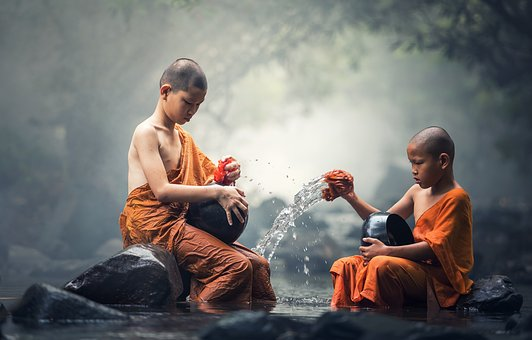

In [ ]:
# Tasks to be done:
# - upload the pickled data (✓)
# - remove all texts, that are too long (✓)
# - tokenize, normalize (✓)
# - remove stopwords (✓)
# - put it in a function:
#    - create verbose argument (✓)
#    - create an argument for additional stopwords (✓)
#    - ???

In [14]:
def preprocessing(directory, verbose=False, remove_words=[], stemming=False, lemmatizing=False):
    """ Returns the preprocessing pipeline utilizing the text_transformer package.
    Additionally words can be passed, that should be removed. Returns corpus and dictionary. """
    import os
    import pickle
    import text_transformer as tt

    article_list = os.listdir(directory)

    articles = []
    corpus = []
    for article_name in article_list:
        article = pickle.load( open("articles/"+article_name, "rb" ) )
        
        #remove all articles shorter than 300 characters
        if len(article["text"]) < 300: 
            continue

        # tokenize the text
        token_list = tt.tokenizer(article["text"])

        # normalize the text
        token_list = tt.normalizer(token_list, remove_words)

        # apply stemming if needed
        if stemming:
            token_list = tt.stemmer(token_list)

        # apply lemmatizing if needed
        if lemmatizing:
            token_list = tt.lemmatizer(token_list)

        corpus.append(token_list)
        articles.append(article)
    
    if verbose:
        print("Dropped: "+ str(round((len(articles) / len(article_list))*100, 2))+ " %")
        print("Dropped: "+ str(len(articles))+ "/"+str(len(article_list)))
        
    return articles, corpus

## I dumped the entire code into a text file ("data_preprocessing.py") in the repo to easily import it.